# Project: Investigate a Dataset - [Kaggle's NoShowAppointment Dataset]
## --- Michal Ezeh

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
#### The dataset selected for this project is the No_show_appointments dataset

This dataset collects information from 100k medical appointments in Brazil and revolves around the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. Some of them include:
<ul>
<li>‘ScheduledDay’ tells us on what day the patient set up their appointment.</li>
<li>‘Age’ indicates the age of the patient</li>
<li>‘Gender’ indicates the gender of the patient</li>
<li>‘Neighborhood’ indicates the location of the hospital.</li>
<li>‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</li>
<li>The last column is the 'No_Show' column, and it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.</li>
</ul>

### Question(s) for Analysis
#### After examining the data from kaggle, these were the questions that arose to be explored:
<ol>
<li>How does the age of the patient influence if they will show up?</li>
<li>Does the appointment time influence if the patient will show or not?</li>
<li>Does being on scholarship affect the likelihood of showing up for appointments?</li>
</ol>


In [2]:
# Importing packages that I plan on using in analysing this data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 
sns.set_style('darkgrid')


<a id='wrangling'></a>
## Data Wrangling

### General Properties


In [3]:
# I load the data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv', parse_dates = [3,4])
print(df.shape)
df.head()


(110527, 14)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#I decided to assess my data to see if there are any problems to fix

In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> **Firstly,I checked for missing data, it is shown that the non-null counts proves that there is no columnn with missing variable.**<br>


In [6]:
#Secondly, I try to find out how many unique values each feature has
for col in df.columns:
    print(f'{col}: {df[col].nunique()}')

PatientId: 62299
AppointmentID: 110527
Gender: 2
ScheduledDay: 103549
AppointmentDay: 27
Age: 104
Neighbourhood: 81
Scholarship: 2
Hipertension: 2
Diabetes: 2
Alcoholism: 2
Handcap: 5
SMS_received: 2
No-show: 2


In [7]:
#Inspecting the values in each variable
for col in df.columns:
    print(f'{col}: {df[col].unique()}')

PatientId: [  2.98724998e+13   5.58997777e+14   4.26296230e+12 ...,   7.26331493e+13
   9.96997666e+14   1.55766317e+13]
AppointmentID: [5642903 5642503 5642549 ..., 5630692 5630323 5629448]
Gender: ['F' 'M']
ScheduledDay: ['2016-04-29T18:38:08.000000000' '2016-04-29T16:08:27.000000000'
 '2016-04-29T16:19:04.000000000' ..., '2016-04-27T16:03:52.000000000'
 '2016-04-27T15:09:23.000000000' '2016-04-27T13:30:56.000000000']
AppointmentDay: ['2016-04-29T00:00:00.000000000' '2016-05-03T00:00:00.000000000'
 '2016-05-10T00:00:00.000000000' '2016-05-17T00:00:00.000000000'
 '2016-05-24T00:00:00.000000000' '2016-05-31T00:00:00.000000000'
 '2016-05-02T00:00:00.000000000' '2016-05-30T00:00:00.000000000'
 '2016-05-16T00:00:00.000000000' '2016-05-04T00:00:00.000000000'
 '2016-05-19T00:00:00.000000000' '2016-05-12T00:00:00.000000000'
 '2016-05-06T00:00:00.000000000' '2016-05-20T00:00:00.000000000'
 '2016-05-05T00:00:00.000000000' '2016-05-13T00:00:00.000000000'
 '2016-05-09T00:00:00.000000000' '2016-0

> **Assessing the unique values of the variables above, it is seen that the Age variable has -1 as one of its values, which is an impossible value**

In [8]:
# Thirdly, in  this cell I tried to assess the records in the dataset 
# by identifying how many records are duplicates
sum(df.duplicated())

0

> **From the cell above, there are no duplicate records present in the dataset**


### Data Cleaning


In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, I performed cleaning steps in this part of the section.


In [10]:
#This code was used to examining the portion of the dataset that has age as -1
df.query('Age == -1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [11]:
# This data is dropped because of the impossible value of -1 as an age
df.drop(df.index[df.Age == -1], inplace = True)

In [12]:
# In this cell, all the column names are converted to lowercase for 
# uniformity, and the typos in the column names are fixed as well¶
df.rename((lambda x: x.lower()), axis = 1, inplace = True)
df.rename(columns = {'hipertension': 'hypertension', 'handcap': 'handicap',
                       'no-show': 'no_show'}, inplace = True)
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis

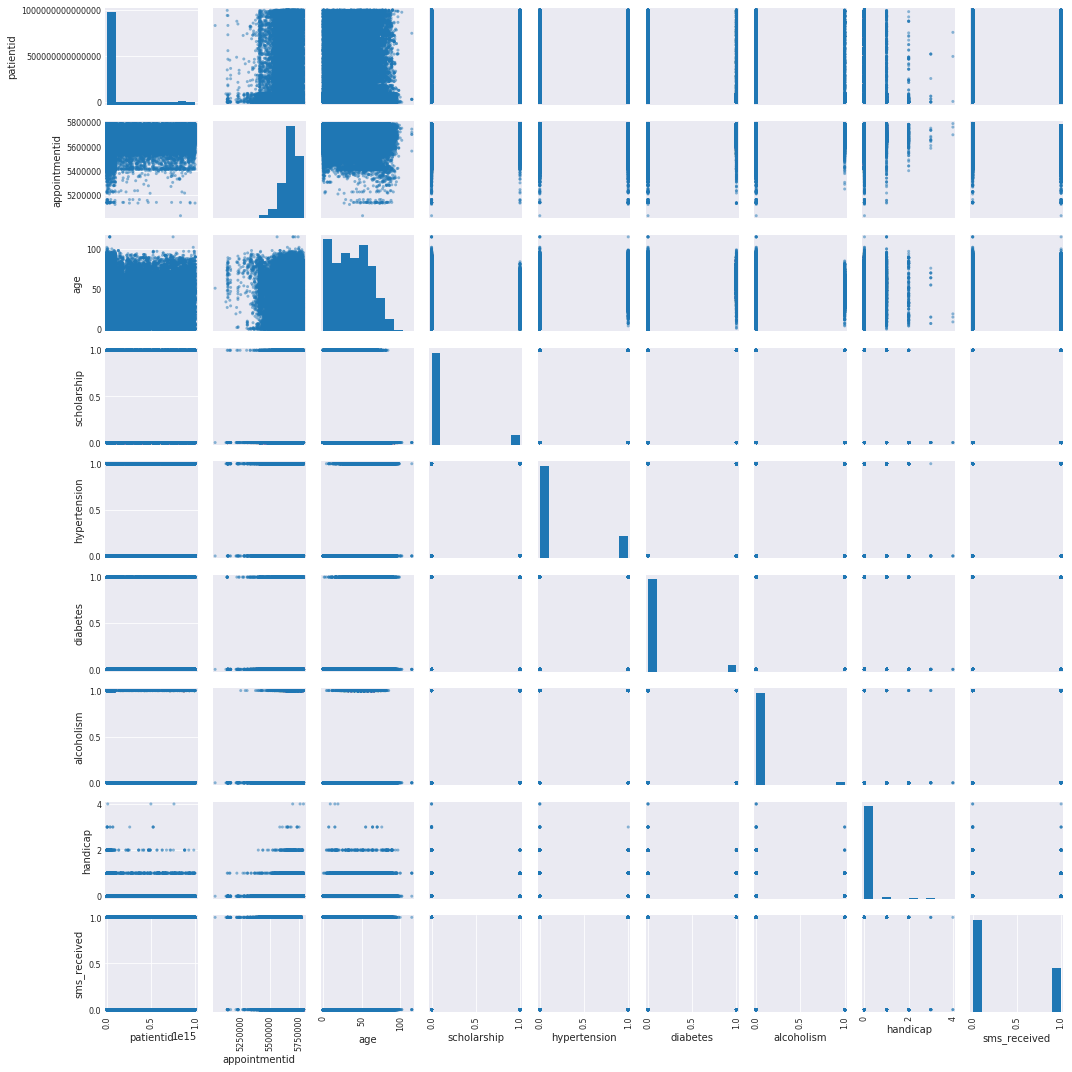

In [13]:
# In this cell, I tried to spot correlations that looks strong using a scatter matrix
# in order to prioritrize the patterns in the dataset
pd.plotting.scatter_matrix(df, figsize = (15, 15));
plt.tight_layout()


In [14]:
# In this cell, the code extracts the column that will be needed from the dataset
def df_munger(columns):
    
    """
 Returns a slice of the original dataframe, containing the variable of interest and the
 
 Parameter
 ---------
 -- columns: str or list of columns of independent variables
 
 Returns
 -------
 A copy of the cleaned dataset, sliced based on the input columns provided
 """
    cols = columns
    if (type(cols) == str):
        cols = [cols]
        cols.extend(['no_show'])
    else:
        cols.extend(['no_show'])
    
    return df.copy()[cols]

### Research Question 1  (How does the age of the patient influence if they will show up?)

In [15]:
# Gathering the age and no_show columns into a new dataframe
age_df = df_munger('age')
age_df.head()


,age,no_show
0,62,No
1,56,No
2,62,No
3,8,No
4,56,No


In [16]:
# Getting some statistics about the age variable
age_df.age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

> Because the value of age is to be an integer, the Mean age for the dataset is <b>37 years</b>

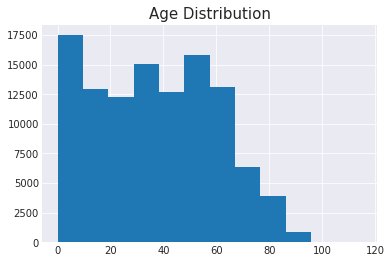

In [17]:
# Plotting the distribution of the ages as a histogram
age_df.hist(figsize = (6,4), bins = 12);
plt.title('Age Distribution', fontsize = 15);

> From the chart above, we can see that most of the patients are between the ages of <b>0</b> and <b>70</b>

In [18]:
# From the chart, I try to categorize the different ages into age groups
bins = [0, 12, 20, 30, 65, 116]
labels = ['kid', 'teenager', 'adolescent', 'adult','elderly_person']
age_df['age_category'] = pd.cut(x = age_df.age, bins = bins, labels = labels)
age_df.head()

,age,no_show,age_category
0,62,No,adult
1,56,No,adult
2,62,No,adult
3,8,No,kid
4,56,No,adult


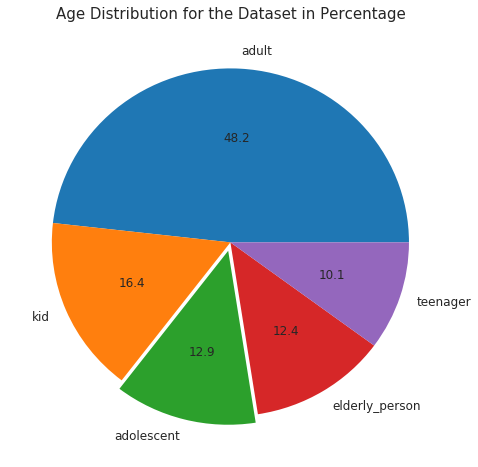

In [19]:
age_distribution = age_df['age_category'].value_counts()

# Visualizing the different age groups that make up this dataset
plt.figure(figsize = (8,8))
plt.pie(age_distribution, labels = age_distribution.index, explode = [0, 0, 0.05, 0, 0], 
        textprops = {'fontsize': 12}, autopct='%.1f');
plt.title('Age Distribution for the Dataset in Percentage', fontsize = 15);

> From the pie plot, it can be inferred that out of all the age groups, the adult group has a larger population of <b>48.2%</b>

In [20]:
# After visualizing, I grouped the patient records by their age category and the likelihood of showing up or not
age_group = age_df.groupby(['age_category', 'no_show']).count()
age_group.head()

age
age_category no_show       
kid          No       13829
             Yes       3668
teenager     No        8023
             Yes       2789
adolescent   No       10389

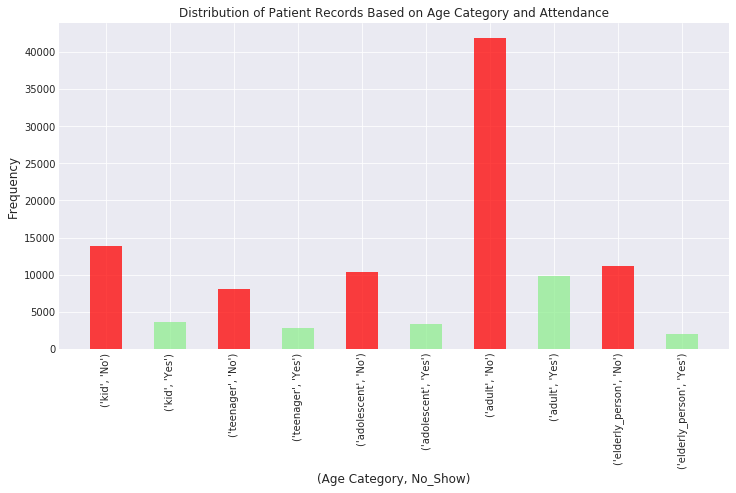

In [21]:
# Visualizing these groupings
plt.figure(figsize = (12,6))
plt.bar(np.arange(1, 1+len(age_group)), height = age_group.age, width = 0.5, 
        tick_label = age_group.index, color = ['#FF0000','lightgreen'], alpha = .75);
plt.xticks(rotation = 90)
plt.xlabel('(Age Category, No_Show)', size = 12)
plt.ylabel('Frequency', size = 12)
plt.title('Distribution of Patient Records Based on Age Category and Attendance', 
          fontsize = 12);

From the bar chart, it can be seen that the highest number of people who did not show up were the adult category. 

In [22]:
# Converting the count for each age group into percentages
age_group_proportion = age_group.age/age_df.groupby('age_category').count()['age']
age_group_proportion

age_category    no_show
kid             No         0.790364
                Yes        0.209636
teenager        No         0.742046
                Yes        0.257954
adolescent      No         0.753755
                Yes        0.246245
adult           No         0.810773
                Yes        0.189227
elderly_person  No         0.844673
                Yes        0.155327
Name: age, dtype: float64

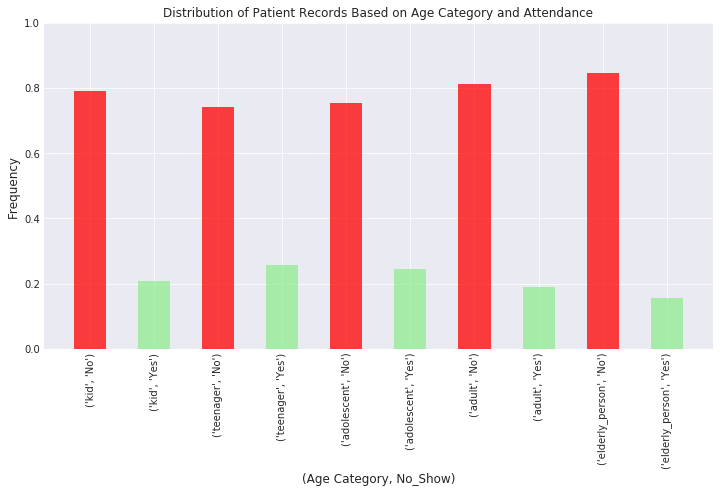

In [23]:
# Visualizing these proportional groupings
plt.figure(figsize = (12,6))
plt.bar(np.arange(1, 1+len(age_group)), height = age_group_proportion, width = 0.5, 
        tick_label = age_group.index, color = ['#FF0000','lightgreen'], alpha = .75)
plt.ylim((0,1))
plt.xticks(rotation = 90)
plt.xlabel('(Age Category, No_Show)', size = 12)
plt.ylabel('Frequency', size = 12)
plt.title('Distribution of Patient Records Based on Age Category and Attendance', 
          fontsize = 12);

> This bar chart plots the dataset based on age category proportion.

### Research Question 2  (Does the appointment time influence if the patient will show up or not?)

In [24]:
# Gathering the appointmentday and no_show columns into a new dataframe
appointment_df = df_munger('appointmentday')
appointment_df.head()

,appointmentday,no_show
0,2016-04-29,No
1,2016-04-29,No
2,2016-04-29,No
3,2016-04-29,No
4,2016-04-29,No


In [25]:
# Retrieving the day from the appointmentday Timstamp variable
appointment_df['day_of_week'] = appointment_df['appointmentday'].apply(lambda x: x.day_name())
appointment_df.head()

,appointmentday,no_show,day_of_week
0,2016-04-29,No,Friday
1,2016-04-29,No,Friday
2,2016-04-29,No,Friday
3,2016-04-29,No,Friday
4,2016-04-29,No,Friday


In [26]:
# Getting the number of appointments made per day
day_of_week_count = appointment_df.day_of_week.value_counts()
day_of_week_count

Wednesday    25867
Tuesday      25640
Monday       22714
Friday       19019
Thursday     17247
Saturday        39
Name: day_of_week, dtype: int64

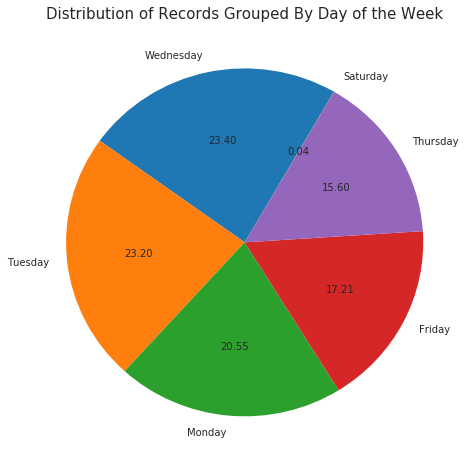

In [27]:
# Plotting the distribution of records grouped by 
# what day of the week the appointment was made
plt.figure(figsize = (8,8))
plt.pie((day_of_week_count*100/len(appointment_df)), 
        labels = day_of_week_count.index, 
        autopct="%.2f", startangle=60);
plt.title('Distribution of Records Grouped By Day of the Week', fontsize = 15);

> This pie chart shows the distribution of records grouped by week in percentage. we can infer that wednesday was the highest appointment day chosen.

In [28]:
# Grouping the dataset based on the day_of_week and no_show variables
day_grouping = appointment_df.groupby(['day_of_week', 'no_show'])['appointmentday'].count()
day_grouping2 = appointment_df.groupby(['day_of_week']).count()['no_show']

# Calculating the percentage of occurence for each of these groupings
day_group_prop = day_grouping/day_grouping2

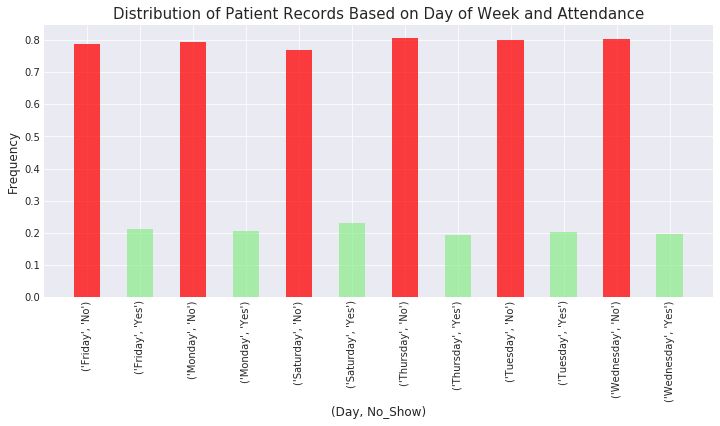

In [29]:
# Visualizing these groupings
plt.figure(figsize = (12, 5))
plt.bar(np.arange(1, 1+len(day_grouping)), height = day_group_prop, width = 0.5, 
        tick_label = day_grouping.index, color = ['#FF0000','lightgreen'], alpha = .75)
plt.xticks(rotation = 90)
plt.xlabel('(Day, No_Show)', size = 12)
plt.ylabel('Frequency', size = 12)
plt.title('Distribution of Patient Records Based on Day of Week and Attendance', fontsize = 15);

> This chart shows the distribution of patient records based on day of week and attendance. It can be seen that saturday had the highest number of attendees.

### Research Question 3 (Does being on scholarship affect the likelihood of showing up for appointments?)

In [30]:
# Gathering the scholarship and no_show columns into a new dataframe
scholarship_df = df_munger('scholarship')
scholarship_df.head()

,scholarship,no_show
0,0,No
1,0,No
2,0,No
3,0,No
4,0,No


In [31]:
# Converting the no_show column to a numeric dataframe
scholarship_df['no_show_numeric'] = df['no_show'].apply(lambda x: 0 if x == 'No' else 1)

In [32]:
# Finding out how many of the records involve patients that are 
# on scholarship and how many do not
scholarship_df.scholarship.value_counts()

0    99665
1    10861
Name: scholarship, dtype: int64

In [33]:
# Converting the value counts to percentages
scholarship_df.scholarship.value_counts()/len(scholarship_df)

0    0.901734
1    0.098266
Name: scholarship, dtype: float64

In [34]:
# Grouping the dataset based on the patient's scholarship status and attendance
sch_df = scholarship_df.groupby(['scholarship', 'no_show']).count()
sch_df

no_show_numeric
scholarship no_show                 
0           No                 79924
            Yes                19741
1           No                  8283
            Yes                 2578

Text(0.5,1,'Distribution of Patient Records Based on Scholarship Status and Attendance')

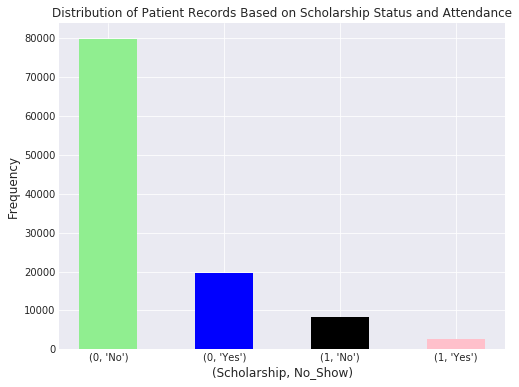

In [35]:
# Visualizing the groupings above using a bar chart
plt.figure(figsize = (8,6))
plt.bar([1,2,3,4], height = sch_df.no_show_numeric, width = 0.5, 
        tick_label = sch_df.index, 
        color = ['lightgreen', 'blue', 'black', 'pink']);
plt.xlabel('(Scholarship, No_Show)', size = 12);
plt.ylabel('Frequency', size = 12);
plt.title('Distribution of Patient Records Based on Scholarship Status and Attendance')

> This is a plot showing the distribution of patient records based on scholarship status and attendance. It can be inferred that the highest population of people without scholarship did not show up.

In [36]:
# Converting the values calculated earlier to percentages
proportion_sch = sch_df /sch_df.groupby('scholarship').sum() #a dataframe showing relative proportions with respect to scholarship category
proportion_sch

no_show_numeric
scholarship no_show                 
0           No              0.801926
            Yes             0.198074
1           No              0.762637
            Yes             0.237363

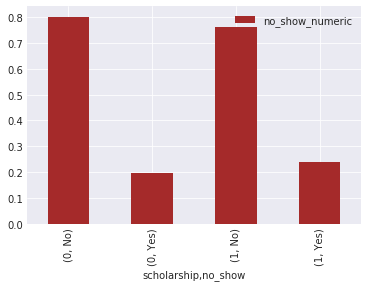

In [39]:
# Plotting these perecentages as a horizontal bar plot
proportion_sch.plot(kind = 'bar', color = 'brown');

> This is a plot showing the distribution of patient records based on scholarship status and attendance in percentage. It can be inferred that the highest population of people without scholarship did not show up.

<a id='conclusions'></a>
## Conclusions


### From the first data question, how does the age of the patient influence if they will show up?

The first research question was to investigate how the age of the patient influences if they will show up or not.
To properly understand this, i grouped the patients based on age categories, and this assisted me in visualizations. The 
following categories were:
<ul>
    <li>Kid: 0-12 years</li>
    <li>Teenager: 12-19 years</li>
    <li>Adolescent: 20-30 years</li>
    <li>Adult: 30-65 years</li>
    <li>Elderly people: >65 years</li>
</ul>

In this dataset, the elderly people category have the highest proportion of people who kept to their appointmenmt, at 85%, while teenagers have the lowest at 74%


### From the second question, does the appointment time influence if the patient will show up or not?

From analysis shows that Wednesday and Tuesday are the days with the most patient records having 23.40% and 23.20% of the records respectively during the time duration these records were being collected.
Saturday is the day with the least amount of records, comprising 0.04% of the records.
There are no records for Sunday.

### From the third question, does being on scholarship affect the likelihood of showing up for appointments?

The results obtained from analysis shows that while 90.2% of the records involve patients not on scholarship and 9.8% involve patients on scholarship, 
<ul>
<li>80.2% of those without scholarship showed up for their scheduled appointment, while roughly 19.8% did not.</li>
<li>Also, among those with a scholarship, 76.2% stuck to their scheduled appointment while ~23.7% did not.</li>
</ul>

## Limitations

These are the following limitations that were observed during the analysis:
<ul>
<li>The dataset was skewed, typically having one category more abundant than another in several variables. In
this work, this was addressed by using proportional representations, but is an issue that would require more
detailed preprocessing steps; e.g data augmentation; if the data is to be modelled in order to avoid biased predictions.</li>
Features where this issue was most prominent in include:
Scholarship,
Gender
</li>
<li>This last one is more of a disclaimer than a limitation. This exploratory analysis only examines corelations,
    and does not in any way imply that causation automatically follows correlation.</li>


### References

1. <a href = 'https://stackoverflow.com'>Stack Overflow</a>: For programming tips and errors
<br>
2. <a href = 'https://www.kaggle.com/datasets/joniarroba/noshowappointments'>Kaggle</a>: For further clarification about the dataset's features

In [41]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0